In [1]:
from opendssdirect import dss

In [2]:
dss('Redirect "../../tests/data/13Bus/IEEE13Nodeckt.dss"')

Various of OpenDSS functions require a meter, so we add one:

In [3]:
dss("New EnergyMeter.Main Line.650632 1")

In [4]:
import networkx as nx

In [5]:
import matplotlib.pyplot as plt

In [6]:
dss.Solution.Solve()

In [7]:
df = dss.utils.lines_to_dataframe()

def create_graph(phase=1):
    G = nx.Graph()

    data = df[['Bus1', 'Bus2']].to_dict(orient="index")

    for name in data:
        line = data[name]
        if f".{phase}" in line["Bus1"] and f".{phase}" in line["Bus2"]:
            G.add_edge(line["Bus1"].split(".")[0], line["Bus2"].split(".")[0])

    pos = {}
    for name in dss.Circuit.AllBusNames():
        dss.Circuit.SetActiveBus(f"{name}")
        if phase in dss.Bus.Nodes():
            index = dss.Bus.Nodes().index(phase)
            re, im = dss.Bus.PuVoltage()[index:index+2]
            V = abs(complex(re, im))
            D = dss.Bus.Distance()

            pos[dss.Bus.Name()] = (D, V)
            
    return G, pos


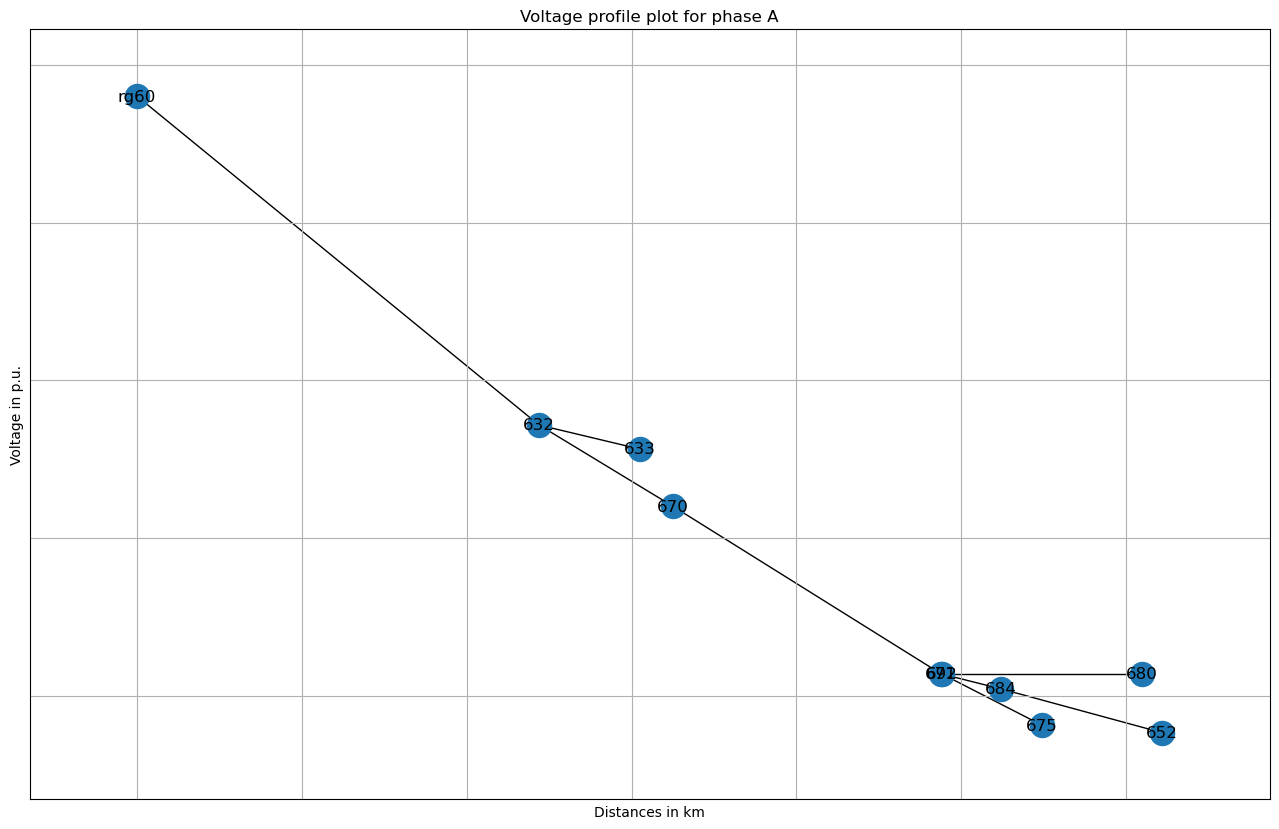

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(16, 10))

ax = axs
G, pos = create_graph(phase=1)
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax, labels={x: x for x in G.nodes()})
nx.draw_networkx_edges(G, pos, ax=ax)

ax.grid()
ax.set_ylabel("Voltage in p.u.")
ax.set_xlabel("Distances in km")
ax.set_title("Voltage profile plot for phase A");


## Integrated plotting

DSS-Extensions also provide replacements for directly plotting from the DSS engine, using matplotlib. This component is completely shared with DSS-Python. It can be enabled like follows:

In [9]:
from dss import plot
plot.enable()

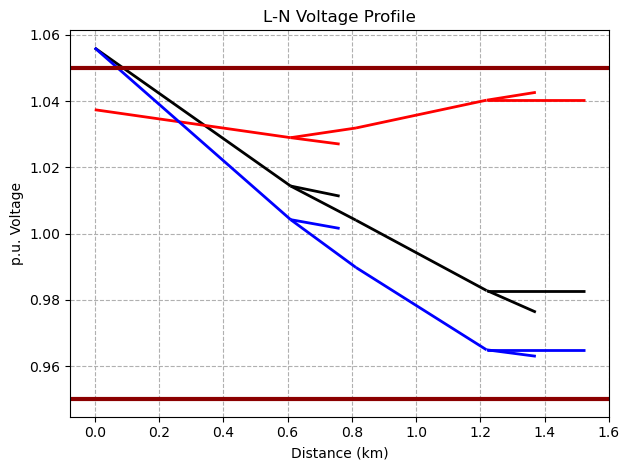

In [10]:
dss('plot profile')

When you enable plotting, currently the notebook integration is also enabled if you are running through a notebook. With that, you can add `%%dss` cells to run DSS script snippets:

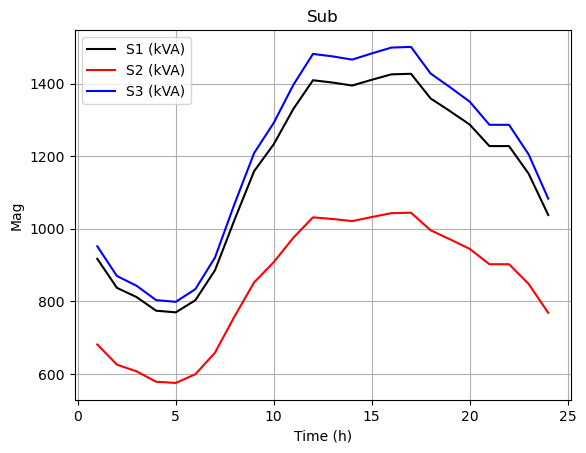

In [11]:
%%dss

BatchEdit Load..* daily=default
New Monitor.Sub Element=Transformer.sub Terminal=2 Mode=1
Solve Mode=Daily
Plot Monitor Object=Sub

See also [Plotting and notebook integration](https://dss-extensions.org/dss_python/examples/Plotting/) for an extensive example gallery.